# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sweetviz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import re
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report , confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                       skiprows = 1 , header = None)
test_set.head()                       

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
             'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
             'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [5]:
train_set.columns = col_labels

In [6]:
test_set.columns = col_labels

In [7]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print('Train Data - rows:' , train_set.shape[0],'columns:', train_set.shape[1])
print('-----------------------------------------------------------')
print('Test Data - rows:' , test_set.shape[0],'columns:', test_set.shape[1])

# Checking Percentage of missing data

In [8]:
total = train_set.isnull().sum().sort_values(ascending = False)
percent = (train_set.isnull().sum()/train_set.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,wage_class,native_country,hours_per_week,capital_loss,capital_gain,sex,race,relationship,occupation,marital_status,education_num,education,fnlwgt,workclass,age
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# training data is clean

In [9]:
# Checking missing data in the test dataset
print("There is {} missing values in the dataframe".format(test_set.isnull().sum().sum()))

There is 0 missing values in the dataframe


In [ ]:
# test dataset is also clean

# Comparing datatypes of both training and test data

In [10]:
pd.DataFrame([train_set.dtypes, test_set.dtypes] ,index=['train_set','test_set'] ).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [12]:
# Checking unique values of target
train_set['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [14]:
n_records = train_set.shape[0]
n_greater_50k = train_set[train_set['wage_class'] == ' >50K'].shape[0]
n_at_most_50k =  train_set[train_set['wage_class'] == ' <=50K'].shape[0]
greater_percent = (n_greater_50k / n_records) * 100
print("Total Number of records: {}".format(n_records))
print("Individuals making more than $50000: {}".format(n_greater_50k))
print("Individuals making at most $50000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50000: {}%".format(greater_percent))

Total Number of records: 32561
Individuals making more than $50000: 7841
Individuals making at most $50000: 24720
Percentage of individuals making more than $50000: 24.080955744602438%


In [15]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
# Data Cleaning - Removing placeholder '?' from the dataframe

In [16]:
train_set.replace(" ?" , np.nan).dropna()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
test_set.replace(" ?" , np.nan).dropna()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
# Assigning train_set and test_set to a new variable

In [18]:
train_df = train_set.replace(" ?" , np.nan).dropna()

In [19]:
test_df = test_set.replace(" ?" , np.nan).dropna()

# EDA with Sweetviz

In [ ]:
# result = sweetviz.analyze([train_df,"TrainData"], target_feat = 'wage_class')

In [ ]:
# result = sweetviz.analyze([test_set,"TestData"], target_feat = 'wage_class')

In [20]:
train_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [ ]:
train_df

In [ ]:
# train_df = train_set[:]

In [ ]:
# test_df = test_set[:]

In [ ]:
# Here i put the train and test set into one so i dont have to keep seperately performing feature engineering
# Also separating cat and num columns

In [ ]:
# all_data=[train_df, test_df]
# cat_list=[]

# for data in all_data:
#     for colname, colvalue in data.iteritems(): 
#         if type(colvalue[1]) == str:
#             cat_list.append(colname) 
# num_list = data.columns.difference(cat_list)

In [ ]:
# replacing the placeholder "?" with NaN values and dropping all the null values in the dataframe

In [ ]:
# for data in all_data:
#     for i in data.columns:
#         data[i].replace(' ?', np.nan, inplace=True)
#     data.dropna(inplace=True)

# Tidying up the wage column

In [ ]:
# train_df['wage_class'] = train_df['wage_class'].replace({" <=50K.": "<=50k" , " >50K.":">50K"})


In [ ]:
# test_df['wage_class'] = test_df['wage_class'].replace({" <=50K.": "<=50k" , " >50K.":">50K"})

In [21]:
train_set2 = train_df[:]

In [22]:
test_set2 = test_df.copy()

In [ ]:
# Run this when something goes wrong so u dont have to run everything from above
train_df = train_set2.copy()

In [ ]:
test_df = test_set2.copy()

In [ ]:
train_df.wage_class.unique()

# Histogram for Age

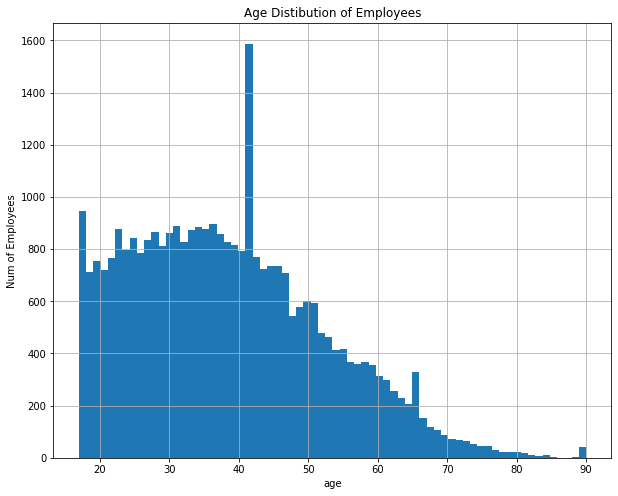

In [23]:
plt.figure(figsize=(10,8))
train_set['age'].hist(bins=70)
plt.title("Age Distibution of Employees")
plt.xlabel("age")
plt.ylabel("Num of Employees")
plt.show()

# Observation : Age of employees is rightly skewed and we also have some outliers

In [ ]:
# Exploring further Age Distibution

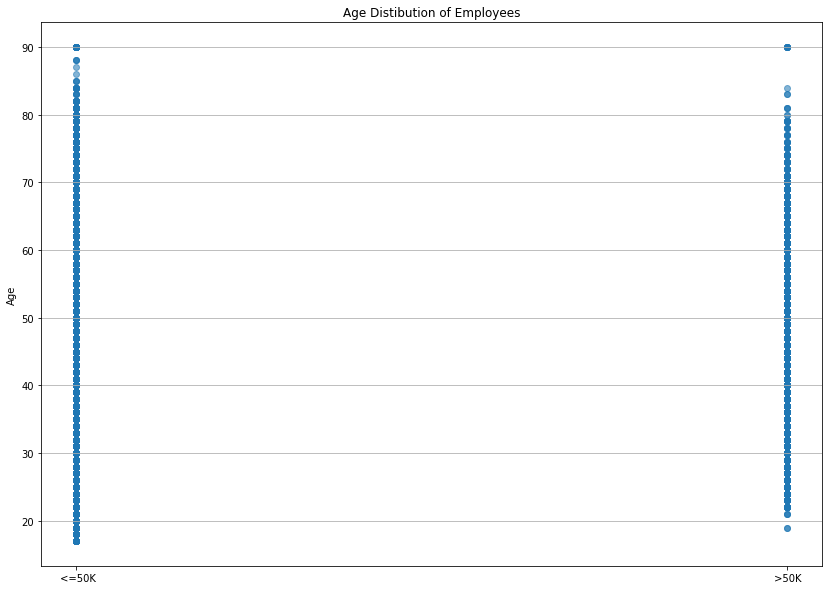

In [24]:
plt.figure(figsize=(14,10))
plt.scatter(train_set['wage_class'], train_set['age'] , alpha=.55)
plt.title("Age Distibution of Employees")
# plt.xlabel("age")
plt.ylabel("Age")
plt.grid(b=True , which = 'major', axis='y')
plt.show()

# Explore the Education columns

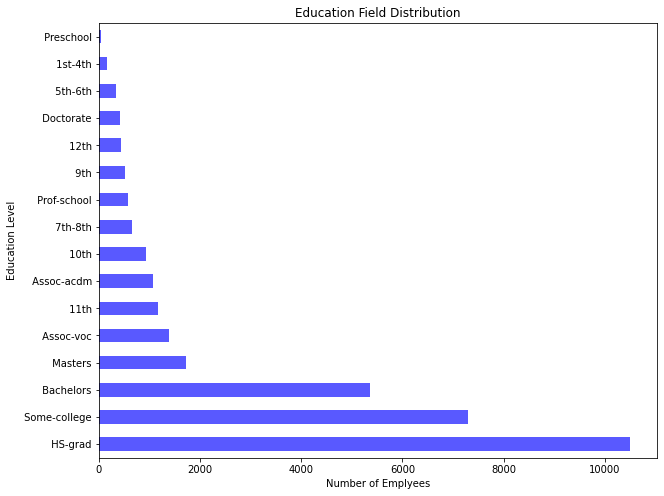

In [25]:
plt.figure(figsize=(10,8))
train_set['education'].value_counts().plot(kind='barh', color='blue',alpha=.65)
plt.title("Education Field Distribution")
plt.xlabel("Number of Emplyees")
plt.ylabel("Education Level")
plt.show()

# Explore data for Marital Status

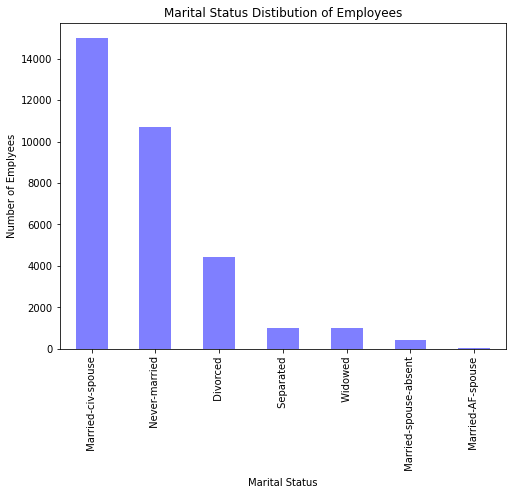

In [26]:
plt.figure(figsize=(8,6))
train_set['marital_status'].value_counts().plot(kind='bar', color='blue' , alpha=.5)
# plt.plot(kind='bar', color='b', alpha=.5)
plt.title("Marital Status Distibution of Employees")
plt.xlabel("Marital Status")
plt.ylabel("Number of Emplyees")
plt.show()

# Gender Distribution in the dataframe

In [27]:
#labels
lab = train_df["sex"].value_counts().keys().tolist()
#values
val = train_df["sex"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Gender distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

![](newplot.png)

# Salary distribution between male and Female

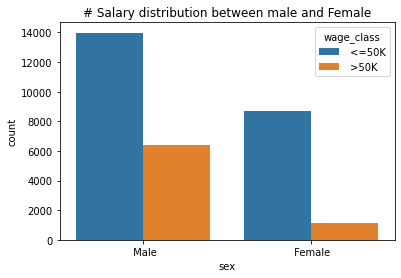

In [28]:
sns.countplot(x='sex' , hue = 'wage_class' , data = train_df)
plt.title("# Salary distribution between male and Female")
plt.show()

# Salary Distrubtion of Workclass

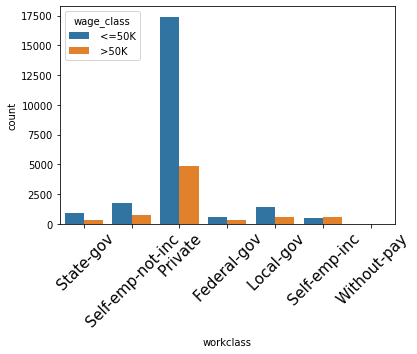

In [29]:
s = sns.countplot("workclass" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 45 , fontsize = 15)
plt.show()

In [ ]:
# Note : we can see we have some placeholders in the columns

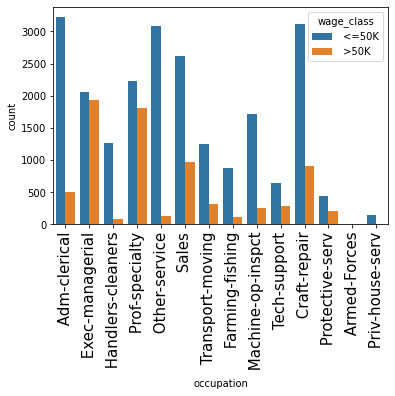

In [30]:
s = sns.countplot("occupation" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 'vertical' , fontsize = 15)
plt.show()

# Salary distribution based on education

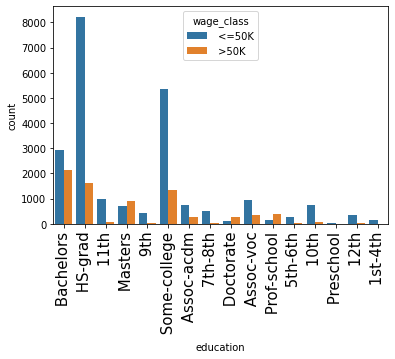

In [31]:
s = sns.countplot("education" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 90 , fontsize = 15)
plt.show()

# Salary Distribution , Above and Below 50k

In [32]:
#labels
lab = train_df['wage_class'].value_counts().keys().tolist()
#values
val = train_df["wage_class"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Wage class distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

![](newplot(1).png)

# Age vs Wage class

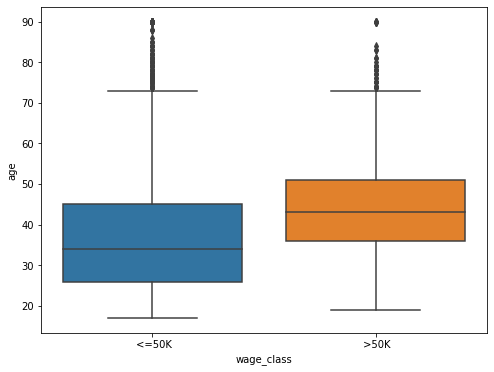

In [33]:
plt.figure(figsize = (8,6))
sns.boxplot(x='wage_class' , y = 'age' , data = train_df)
plt.show()

In [ ]:
# Salary vs Race

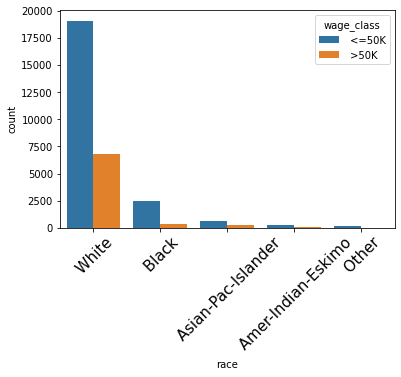

In [34]:
s = sns.countplot("race" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 45 , fontsize = 15)
plt.show()

In [ ]:
# [' <=50K', ' >50K']

In [43]:
train_df1 = train_df.copy()

In [44]:
test_df1 = test_df.copy()

In [48]:
test_df1.wage_class.unique()

array([1, 0])

# Feature Engineering 

In [46]:
train_df1['wage_class']=train_df1['wage_class'].apply(lambda x: 1 if x==" >50K." else 0)

In [47]:
test_df1['wage_class']=test_df1['wage_class'].apply(lambda x:1 if x==" <=50K." else 0)


In [ ]:
# Gender,Race,Marital_status

In [ ]:
train_df1['sex']=train_df1['sex'].apply(lambda x: 1 if x==" Male" else 0)
train_df1['race']=train_df1['race'].apply(lambda x: 1 if x==" White" else 0)
train_df1['marital_status']=train_df1['marital_status'].apply(lambda x: " Married" if x.startswith('Married',1) else 'Single')
train_df1['marital_status']=train_df1['marital_status'].apply(lambda x: 1 if x==" Married" else 0)


test_df1['sex']=test_df1['sex'].apply(lambda x: 1 if x==" Male" else 0)
test_df1['race']=test_df1['race'].apply(lambda x: 1 if x==" White" else 0)
test_df1['marital_status']=test_df1['marital_status'].apply(lambda x: " Married" if x.startswith('Married',1) else 'Single')
test_df1['marital_status']=test_df1['marital_status'].apply(lambda x: 1 if x==" Married" else 0)



# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
num_cols = ['age','education_num', 'capital_gain','capital_loss','hours_per_week']
features_to_minmax = pd.DataFrame(data = features_log_transformed)
features_to_minmax[num_cols] = sc.fit_transform(features_log_transformed[num_cols])


In [ ]:
features_to_minmax.head()

In [ ]:
# Check results

In [ ]:
train_df

In [ ]:
test_df

In [ ]:
train_df.wage_class.unique()

In [ ]:
test_df.wage_class.unique()

# Note : Since we have Many categrocal columns - hence I need to create dummy variables for them all